                             RFM Analysis and KMeans clustering

           Table of contents

1. importing prerequisite libraries
2. uploading our dataset
3. Descriptive statistics
5. Data Visualisation and analysis 
6. RFM analysis 
7. Normalization of the data
8. Kmeans clustering of the RFM

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Uploading our dataset from a local directory. It can be downloaded from www.kaggle.com

In [2]:
# uploading our dataset
df = pd.read_csv(r'../tochora/ddos/popp/US  E-commerce records 2020.csv', encoding='latin1')
# displaying its contents
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


This dataset has columns that have spaces between them thus they need to be renamed to be in a format that can be read by python.

In [13]:
# renaming columns
df.rename(columns={"Order Date": "Order_date", "Row ID": "Row_ID", "Order ID": "Order_ID", "Ship Mode": "Ship_mode", "Customer ID": "Customer_ID",
"Postal Code": "Postal_code", "Product ID": "Product_ID", "Product Name": "Product_name"}, inplace=True)
df.head(15)

,Order_date,Row_ID,Order_ID,Ship_mode,Customer_ID,Segment,Country,City,State,Postal_code,Region,Product_ID,Category,Sub-Category,Product_name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
5,01-01-20,8072,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
6,01-01-20,8073,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4,0.2,2.2288
7,01-01-20,8074,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
8,01-01-20,8075,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842
9,01-01-20,8076,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212


In [4]:
# shape of the dataset
df.shape

(3312, 19)

This dataset has 3312 rows and 10 columns.

                        Removing Duplicates

This dataset my contain duplicated values that may skew our data making the resultant analysis inaccurate.We will remove them by removing any repeated identity number(ID) of a customer.

In [123]:
# checking and removing duplicate customers
df = df.loc[~df['Customer_ID'].index.duplicated()]

In [124]:
# checking the shape of the dataset after removing duplicates
df.shape

(3312, 19)

The shape of the dataset has remained the same meaning there wasn't any duplicated customers in our data

In [125]:
# checking null values
df.isnull().sum()

Order_date      0
Row_ID          0
Order_ID        0
Ship_mode       0
Customer_ID     0
Segment         0
Country         0
City            0
State           0
Postal_code     0
Region          0
Product_ID      0
Category        0
Sub-Category    0
Product_name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Our data does have any null values

                  Descriptive Statistics

This will involve estimating various statistical  measures to our variables like mean, count, standard deviation, maximum value and minimum value and quantiles. The variables are the index while the column is made up of the statistical parameters.

In [126]:
# filtering important columns to derive statistical analysis
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Sales,3312.000000,221.381418,585.257531,0.444000,17.018000,53.810000,205.105700,13999.960000
Quantity,3312.000000,3.766908,2.221776,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,3312.000000,0.156467,0.207429,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,3312.000000,28.212340,241.864342,-3839.990400,1.763200,8.296800,28.315125,6719.980800


In [127]:
# data types
df.dtypes

Order_date       object
Row_ID            int64
Order_ID         object
Ship_mode        object
Customer_ID      object
Segment          object
Country          object
City             object
State            object
Postal_code       int64
Region           object
Product_ID       object
Category         object
Sub-Category     object
Product_name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [128]:
#df['Order_ID'] = df['Order_ID'].astype(str)

There are some cities which may have similar names yet they are from different states thus we will modify them to show both city's name and its respective state. We will remove country column because it involves one country i.e USA

In [129]:
# combining a city with its approppriate state
df['State_'] = df['City'] + "," + df['State']
# dropping state, city, and country since they are unimportant to our analysis
df.drop(columns=['State', 'City', 'Country'], inplace=True, axis=1)
df.head()

,Order_date,Row_ID,Order_ID,Ship_mode,Customer_ID,Segment,Postal_code,Region,Product_ID,Category,Sub-Category,Product_name,Sales,Quantity,Discount,Profit,State_
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,"Lorain,Ohio"
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,"Los Angeles,California"
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,"Franklin,Wisconsin"
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,"Huntsville,Texas"
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,"Huntsville,Texas"


                        Data Visualisation

Bivariate Analysis

This is analysis that is used to depict relationship between two variables that is to check any correlation among those variables.It helps to see how they are connected and find trends and patterns in the data.

1. Cities with highest number of orders

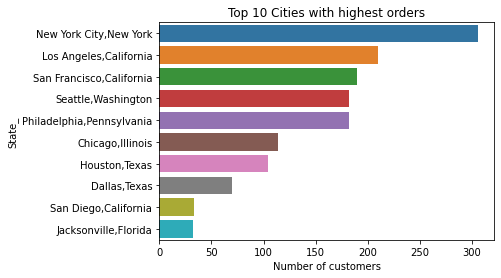

In [130]:
total_orders = df.groupby('State_')['Customer_ID'].count().reset_index().sort_values(by = "Customer_ID", ascending = False)
#total_orders = pd.DataFrame(total_orders.rename(columns= {"Customer_ID": "counts"}, inplace=True))
ax = sns.barplot(x='Customer_ID', y= 'State_', data=total_orders[:10])
ax.set_title("Top 10 Cities with highest orders")
plt.xlabel("states")
plt.xlabel("Number of customers")
plt.show()

New York City is the highest with more than 300 orders, seconded by Los Angelels with approximately 220 orders while Jackssonville and San Diego both from California have the smallest bars with less than 50 orders among the top 10 cities with the highest number of orders.

Conclusion: A simple google search shows;

New York and Los Angeles have the highest customer orders, my hypothesis being is because of their huge population than the rest of the cities. There are other factors  that explains why San Fransisco has huge customer orders compared to Seattle which has a larger population than it. 

On lower side Houston has a huge population than Dallas, while San Diego has a slightly larger population than JacksonVille. This roughly supports my hypothesis that huge population matters on number of orders.

2. Top 10 customers with the highest number of purchases

Text(0.5, 1.0, 'Top 10 customers with highest sales')

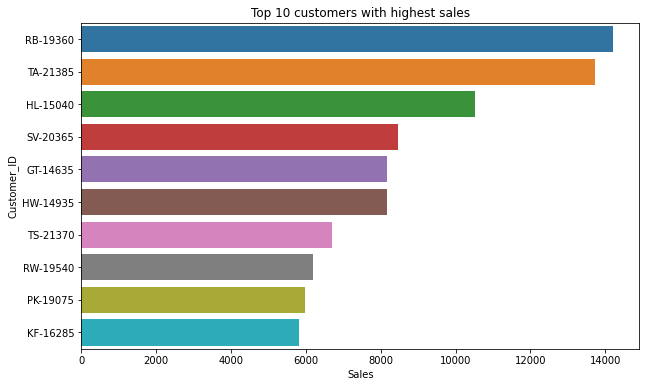

In [132]:
# grouping Sales in relation to how much a consumer buys from our organization
total_value = df.groupby('Customer_ID')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sales', y='Customer_ID', data=total_value[:10])
ax.set_title("Top 10 customers with highest sales")

from the figure above, Consumer RB-19360 had the highest purchases of more than 14000 value of goods/services from our organization, followed by consumer with ID TA-21325 with purchases amounting to almost 14000 while the one with ID KF-16285 had the lowest purchases of less than 6000 among our top 10 consumers.

Conclusion: The organization should offer various incentives such as discounts, after sales services etc for these customers to maintain their loyalty and encourange new ones since they represent those customers that buy the bulky amounts of goods from us.

3. Market Segments with Highest Sales

Text(0.5, 1.0, 'Market segments making highest Sales')

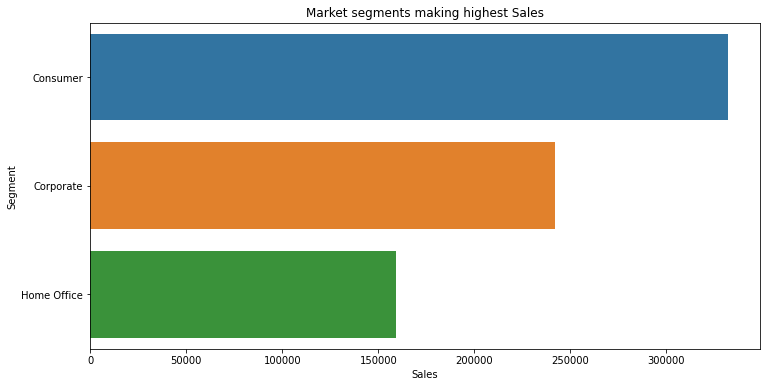

In [133]:
# grouping Sales according to consumer segments
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
#segment_sales['% total sales'] = (segment_sales['Sales']/segment_sales['Sales'].sum()) ** 100
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= 'Sales', y='Segment', data=segment_sales[:10])
ax.set_title("Market segments making highest Sales")

Consumer markets are the largest making more than 300000 sales, followed by Corporate segment with close to 250000 sales while Home Office market has the smallest bar with slightly more than 150 000 sales.

Conclusion: There is high stock turn-over in consumer market because it involves a variety of products thus a larger market translating to higher sales while Home Office has less stock turnover since it has a smaller market thus less sales

4. Mode of shipment preferred by consumers

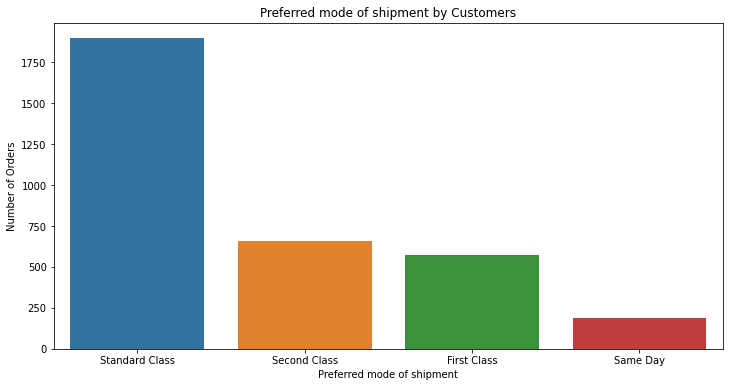

In [134]:
# grouping Orders based on preferred mode of shipment
ship_values = df.groupby("Ship_mode")['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)
plt.figure(figsize=(12, 6))
# plotting the realtionship betweeen ship mode and consumer orders
ax = sns.barplot(x='Ship_mode', y='Order_ID', data=ship_values)
ax.set_title("Preferred mode of shipment by Customers")
plt.xlabel("Preferred mode of shipment")
plt.ylabel("Number of Orders")
plt.show()

Standard Class was the most preferred mode of shipment with  1750 entries, followed by second class with slightly more than 500 entries while Same Day was the least one with less than 250 entries

conclusion:

Consumers prefer Standard class because it it cheap, can take goods that weighs more than the 227 grams. The organizations should stock more goods that are preferred for standard class while using various marketing strategies to target consumers that use this mode of shipment to attract more sales. second class attracts some discounts thus it explains it being second of the most preferred mode of shipment.

First class comes third because it is limited to items less than 13 ounces and is expensive compared to Standard class and Second Class while Same Day comes last because it is the most expensive although there is guarantee of delivery or refund if not delivered.

5. Distribution of Sales according to region

Text(0.5, 1.0, 'Distribution of Sales sccording to region')

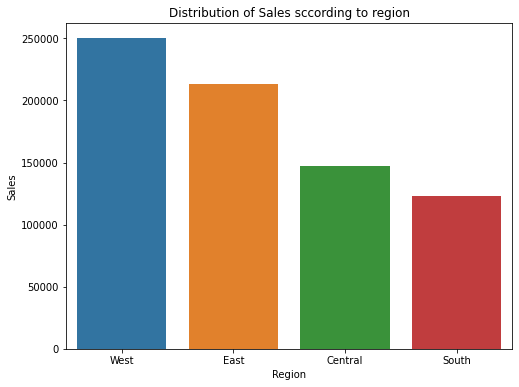

In [15]:
# grouping the amount of sales depending on a region
Sales_by_region = df.groupby("Region")['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(8, 6))
# plotting relationship between Sales and  region
ax = sns.barplot(x='Region', y='Sales', data=Sales_by_region)
ax.set_title("Distribution of Sales sccording to region")

The western Region has the highest amount of sales of more than 250000 units, follwed by East with slightly more than 200000 units while The southern region has the smallest bar with slightly more than 100000 units.

6. Number of Orders made depending on a month

Text(0.5, 1.0, 'Number of orders by months')

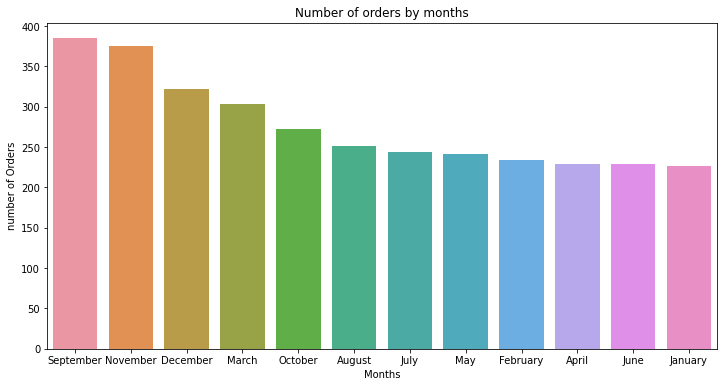

In [53]:
# converting order_datefrom an object into datetime object
df['Order_date'] = pd.to_datetime(df["Order_date"])
# grouping orders in relation to month
orderbymonth = df.groupby(df["Order_date"].dt.month_name())["Order_ID"].count().reset_index().sort_values(by="Order_ID", ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Order_date", y="Order_ID", data=orderbymonth)
ax.set_xlabel('Months')
ax.set_ylabel("number of Orders")
ax.set_title("Number of orders by months")

from the figure:

September and November have the largest bars  with more than 350 orders, December come second with slightly more than 300 orders while April, June and January have the lowest number of orders in a year with less than 250 each.

Conclusion: Consumers placed orders mostly on September and November, followed by December while January, April and June forms months where the number of orders were few.

7. Number of Orders made depending on the day of the week

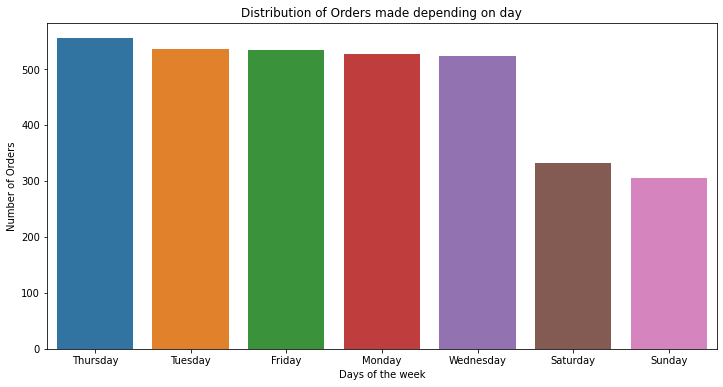

In [54]:
# grouping orders depending on the day of the week
Orders_by_day = df.groupby(df['Order_date'].dt.day_name())['Order_ID'].count().reset_index().sort_values(by='Order_ID', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Order_date', y='Order_ID', data=Orders_by_day)
ax.set_title("Distribution of Orders made depending on day")
plt.xlabel("Days of the week")
plt.ylabel("Number of Orders")
plt.show()

from the figure:

Thusdays have the largest number of Orders with  more than 500 orders has the largest bar while Weekends that is Saturday with 300 orders, Sunday less than 300 orders have the smallest bars. The rest of the days have almost equal number of orders as shown by the size of their bars.

Conclusion: Most of consumers place their orders on Thursdays while only a few of them place orders on weekends.The rest of the days register almost the same number of orders.

8. Products with highest and few sales turnover

In [56]:
plt.figure(figsize=(10, 8))
product_sales = df.groupby("Product_name")['Sales'].agg(["mean", "count"]).sort_values('mean', ascending=False)
# products with sales turnover more than 8
bestsales = product_sales[product_sales['count'] >= 8][:18]
bestsales

,mean,count
Product_name,,
"Global Wood Trimmed Manager's Task Chair, Khaki",233.136250,8
Easy-staple paper,64.129750,16
Staple envelope,31.040364,11
Staples in misc. colors,27.182333,12
Storex Dura Pro Binders,17.745750,8
Staples,15.630400,15
Staple remover,13.228000,8


<Figure size 720x576 with 0 Axes>

In [55]:
# products with smallest turnovers
worstSales = product_sales[product_sales['count'] <= 8][:18]
worstSales

,mean,count
Product_name,,
Canon imageCLASS 2200 Advanced Copier,11899.966000,3
Cubify CubeX 3D Printer Triple Head Print,7999.980000,1
"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960000,1
Cubify CubeX 3D Printer Double Head Print,4799.984000,1
HON 5400 Series Task Chairs for Big and Tall,3610.047000,2
GBC DocuBind P400 Electric Binding System,3538.574000,2
Hewlett-Packard Desktjet 6988DT Refurbished Printer,3404.500000,1
Martin Yale Chadless Opener Electric Letter Opener,2956.475500,4
Lexmark MX611dhe Monochrome Laser Printer,2804.983500,2


It seems most of the products that were sold infrequentry are technological products with high price tags

                          Recency, Frequency and Monetary (RFM) Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R): The number of days between present date and last date purchase of each customer.

Frequency (F): Total number of times a consumer purchased goods/services from us

Monetary Value (M): Total money spent by a particular customer on our business.

In [152]:
#RFm analysis
df_recency = df.groupby("Customer_ID", as_index=False)['Order_date'].max()
df_recency.rename(columns={"Order_date": "Last_purchasedate"}, inplace=True)
df_recency['Last_purchasedate'] = df_recency['Last_purchasedate'].dt.date
recent_date = df['Order_date'].dt.date.max()
df_recency['Recency'] = df_recency['Last_purchasedate'].apply(lambda x : (recent_date - x).days)
df_recency.head()

,Customer_ID,Last_purchasedate,Recency
0,AA-10315,2020-06-29,184
1,AA-10375,2020-11-12,48
2,AA-10480,2020-04-15,259
3,AA-10645,2020-05-11,233
4,AB-10060,2020-09-16,105


In [157]:
#frequency
frequency_df = df.groupby("Customer_ID").agg({"Order_ID": "nunique"}).reset_index()
frequency_df.rename(columns={"Order_ID": "Frequency"}, inplace=True)
frequency_df.head(7)

,Customer_ID,Frequency
0,AA-10315,1
1,AA-10375,2
2,AA-10480,1
3,AA-10645,1
4,AB-10060,4
5,AB-10105,5
6,AB-10150,2


In [171]:
monetary_df = df.groupby("Customer_ID", as_index=False)['Sales'].sum()
monetary_df.rename(columns = {"Sales": "Monetary_value"}, inplace=True)
monetary_df.head(8)

,Customer_ID,Monetary_value
0,AA-10315,374.480
1,AA-10375,206.732
2,AA-10480,15.552
3,AA-10645,12.960
4,AB-10060,2936.264
5,AB-10105,2291.044
6,AB-10150,230.656
7,AB-10165,416.272


In [172]:
RFM_df = df_recency.merge(frequency_df, on="Customer_ID").merge(monetary_df, on='Customer_ID').drop(columns='Last_purchasedate', axis=1)
RFM_df.head(10)


,Customer_ID,Recency,Frequency,Monetary_value
0,AA-10315,184,1,374.480
1,AA-10375,48,2,206.732
2,AA-10480,259,1,15.552
3,AA-10645,233,1,12.960
4,AB-10060,105,4,2936.264
5,AB-10105,41,5,2291.044
6,AB-10150,41,2,230.656
7,AB-10165,106,4,416.272
8,AB-10255,166,3,738.674
9,AB-10600,80,1,1475.054


In [174]:
# removing zeros in our data
RFM_df[RFM_df.columns[1:]] = RFM_df[RFM_df.columns[1:]].applymap(lambda x : 1 if x == 0 else x)

       Normalisation

Before we conduct Kmeans clustering is better we check skewness of  our data

In [177]:
from scipy import stats
# a function to check skewness of data
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title("Distribution of " + column)
    #plotting skewness of data
    sns.distplot(df_skew[column])
    plt.show()
    print("{}'s: Skew: {}, :{}".format(column, skew, skewtest))
    return

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


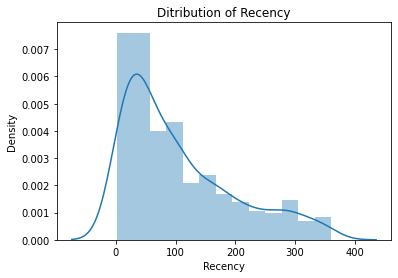

Recency's: Skew: 1.0270084156768817, :SkewtestResult(statistic=9.370983604133878, pvalue=7.185969690459123e-21)


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


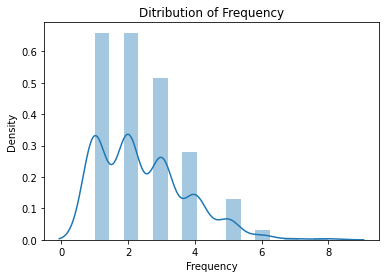

Frequency's: Skew: 0.8740374567334025, :SkewtestResult(statistic=8.27800824546187, pvalue=1.2525255732542123e-16)


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


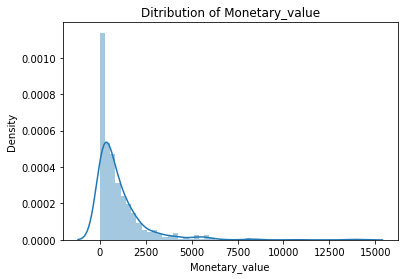

Monetary_value's: Skew: 3.826135751727133, :SkewtestResult(statistic=20.12375970043745, pvalue=4.570667710146086e-90)


In [179]:
# iterating through the columns to check skewness
for col in RFM_df.columns[1:]:
    check_skew(RFM_df, col)

skewness with a value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In Order to remove skewness, logarithmic transformations will be applied to this data

In [180]:
RFM_df_log = RFM_df.copy()
# iterating through the columns and applying base 10 logarithmic function
for cols in RFM_df.columns[2:]:
    RFM_df_log[cols] = np.log10(RFM_df_log[cols])

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


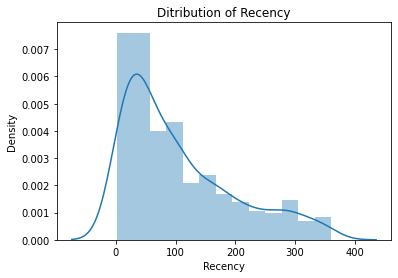

Recency's: Skew: 1.0270084156768817, :SkewtestResult(statistic=9.370983604133878, pvalue=7.185969690459123e-21)


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


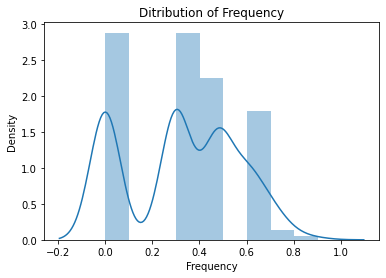

Frequency's: Skew: -0.07117909258314377, :SkewtestResult(statistic=-0.772094835705647, pvalue=0.44005826068804654)


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


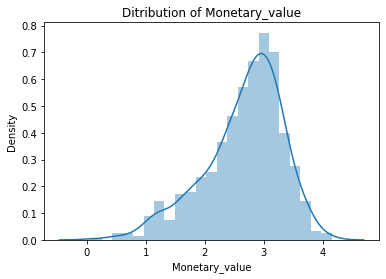

Monetary_value's: Skew: -0.7885415957320923, :SkewtestResult(statistic=-7.621994093615499, pvalue=2.4978646847378672e-14)


In [182]:
# checking skewness after applying logarithmic transformation
for c in RFM_df.columns[1:]:
    check_skew(RFM_df_log, c)

skewness has not been eliminated but most of it has been removed

Scaling Data

we will scale our data since K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.

                                                                                        from stackoverflow

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RFM_df_table = scaler.fit_transform(RFM_df_log.drop("Customer_ID", axis=1))
RFM_table = pd.DataFrame(RFM_df_table, columns= RFM_df_log.columns[1:])
RFM_table

,Recency,Frequency,Monetary_value
0,0.860239,-1.344803,-0.126113
1,-0.611058,-0.089972,-0.511995
2,1.671616,-1.344803,-2.192422
3,1.390339,-1.344803,-2.310841
4,0.005589,1.164858,1.211453
...,...,...,...
688,-0.665149,1.164858,-0.007787
689,-1.087065,-1.344803,0.325581
690,-1.032974,1.568823,1.599947
691,-0.546148,1.164858,-0.451060


                                       Kmeans Clustering

This is unsupervised clustering algorithm that groups  unlabelled data depending on how they are laid up in a space. It Uses eucledian distance which measures the difference between 2 points that is if there is point x and y, eucledian distance is ||x - y||.

It works by ensuring that each data point is assigned to one
and only one cluster in a sample space. Thus the algorithm learns to position the cluster centers such that
the total sum of the Euclidean distance between each data point and its cluster center is minimized. Using KMeans, we will segment consumers based on the recency, frequency and monetary value of their purchases.

In [187]:
from sklearn.cluster import KMeans
#an empty lit
distortions = []
# a range of possible clusters in our data
K = range(1, 10)
# iterating through the possible number of clusters
for k in K:
    kmeansModel = KMeans(n_clusters = k)
    # training our data
    kmeansModel.fit(RFM_table)
    # measurinf how our data was measured and appending it into our empty list
    distortions.append(kmeansModel.inertia_)

Elbow Plot

This is a plot that shows the modeller the appropriate number of clusters to be used in our model

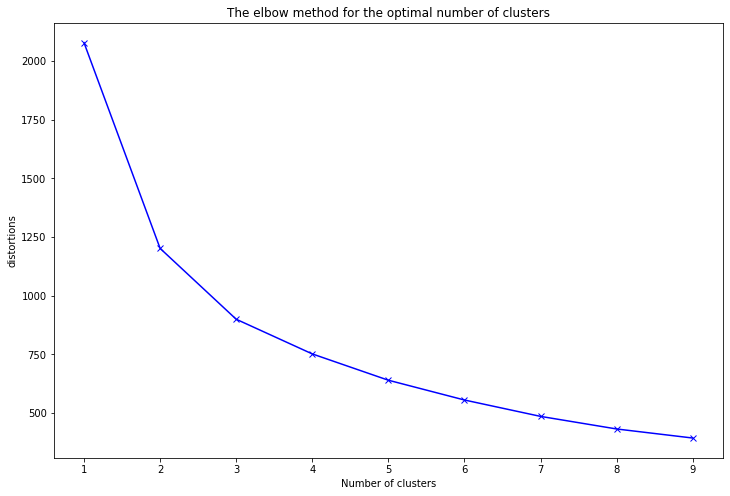

In [188]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortions, 'bx-')
plt.ylabel("distortions")
plt.xlabel("Number of clusters")
plt.title("The elbow method for the optimal number of clusters")
plt.show()

from the figure above:

An elbow forms at 3 showing that it is the appropriate number of clusters since it is at this point that inertia start to decrease in a linear manner.

In [194]:
# uing the 3 clusters in our model
kmeans_model = KMeans(n_clusters=3, random_state=3)
kmeans_y = kmeans_model.fit_predict(RFM_table)
#receiving labels as indices of our clusters
RFM_df['Clusters'] = kmeans_model.labels_

In [195]:
# a function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['Clusters']).agg({
        "Recency" : "mean",
        "Frequency" : "mean",
        "Monetary_value" : ["count", "mean"]
    }).round(0)
    return df_new

In [196]:
rfm_values(RFM_df)

Recency Frequency Monetary_value        
            mean      mean          count    mean
Clusters                                         
0           71.0       1.0            169   272.0
1          252.0       1.0            150   632.0
2           61.0       3.0            374  1584.0

Note:
references:

 https://datascience.stackexchange.com/questions/22795/do-clustering-algorithms-need-feature-scaling-in-the-pre-procesing

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/code